In [1]:
%matplotlib inline

In [2]:
import sys
sys.dont_write_bytecode = True
import seaborn as sns
sns.set(style="whitegrid", color_codes=True, font_scale=1.2)
from ggplot import *
from dataMethods import *
import pandas as pd

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.



In [102]:
import os
from os.path import expanduser

In [103]:
homeDirectory = expanduser("~")
dataDirectory = homeDirectory + os.sep + 'Google Drive/tACS_VWM_ALPHA/data/stim1/'

In [104]:
dataSheets = [dataDirectory + 's1/runData/run3_2016_Jul_21_1044.csv']

In [105]:
conds = OrderedDict([('t2d0', (2, 0)), ('t2d2', (2, 2)), ('t2d4', (2, 4)), ('t4d0', (4, 0)), ('t4d2', (4, 2)), ('t4d4', (4, 4))])

In [106]:
hemiConds = OrderedDict([('t1d0', (1, 0)), ('t1d1', (1, 1)), ('t1d2', (1, 2)), ('t2d0', (2, 0)), ('t2d1', (2, 1)), ('t2d2', (2, 2))])

In [107]:
testRuns = [(1,3)]

In [108]:
dataIndeces = []
for run in testRuns:
    for key in conds:
        dataIndeces.append(str(run)+key)

dataColumns = ['K', 'hitRate', 'faRate', 'RT', 'dPrime']

In [109]:
data = pd.DataFrame()
i = 0
for sheet in dataSheets:
    kVals = pashlerK(sheet)['Kvals']
    hitRates = pashlerK(sheet)['hitRates']
    faRates = pashlerK(sheet)['fAlarmRates']
    rtRates = rtCalc(sheet)
    dpVals = dprime(sheet)
    for key in conds:
        row = pd.Series([kVals[key],hitRates[key],faRates[key],rtRates[key],dpVals[key]],name=dataIndeces[i], index=dataColumns)
        row['targs'] = str(conds[key][0])
        row['dists'] = str(conds[key][1])
        data = data.append(row)
        i += 1

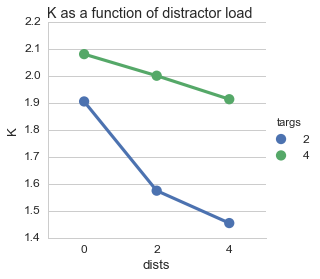

In [110]:
kGraph = sns.factorplot(data=data,x='dists',y='K',hue='targs')
kGraph.fig.suptitle('K as a function of distractor load')

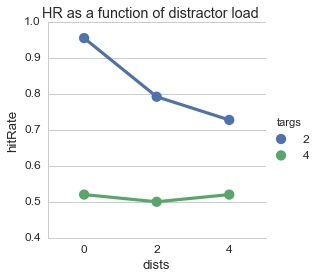

In [112]:
hitGraph = sns.factorplot(data=data,x='dists',y='hitRate',hue='targs')
hitGraph.fig.suptitle('HR as a function of distractor load')

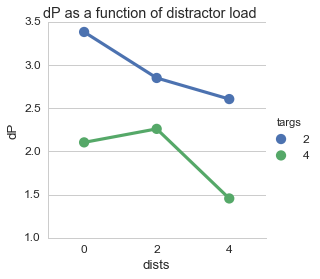

In [113]:
dprimeGraph = sns.factorplot(data=data,x='dists',y='dPrime',hue='targs')
dprimeGraph.fig.suptitle('dP as a function of distractor load')
dprimeGraph.set_axis_labels('dists', 'dP')

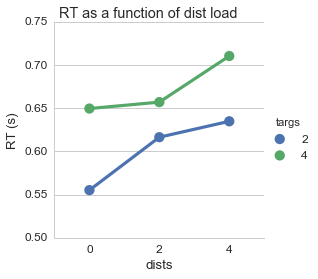

In [116]:
rtGraph = sns.factorplot(data=data,x='dists',y='RT',hue='targs')
rtGraph.set_axis_labels('dists', 'RT (s)')
rtGraph.fig.suptitle('RT as a function of dist load')

In [117]:
hemDataIndeces = []
for run in testRuns:
    for key in hemiConds:
        hemDataIndeces.append(str(run)+key)

hemDataColumns = ['leftHitRate','rightHitRate']

In [118]:
hemData = pd.DataFrame()
j = 0
for sheet in dataSheets:
    leftHits = leftHemHitRates(sheet)
    rightHits = rightHemHitRates(sheet)
    for key in hemiConds:
        row = pd.Series([rightHits[key],leftHits[key]],name=hemDataIndeces[j], index=hemDataColumns)
        row['targs'] = str(hemiConds[key][0])
        row['dists'] = str(hemiConds[key][1])
        hemData = hemData.append(row)
        j += 1

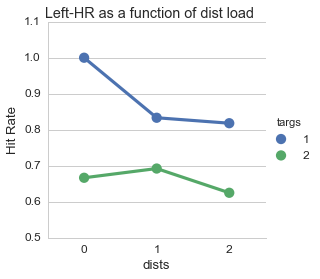

In [121]:
leftHitGraph = sns.factorplot(data=hemData,x='dists',y='leftHitRate',hue='targs')
leftHitGraph.set_axis_labels('dists', 'Hit Rate')
leftHitGraph.fig.suptitle('Left-HR as a function of dist load')

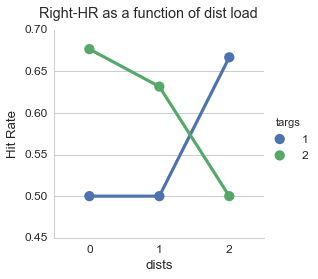

In [123]:
rightHitGraph = sns.factorplot(data=hemData,x='dists',y='rightHitRate',hue='targs')
rightHitGraph.set_axis_labels('dists', 'Hit Rate')
rightHitGraph.fig.suptitle('Right-HR as a function of dist load')
rightHitGraph.fig.subplots_adjust(top=.9)

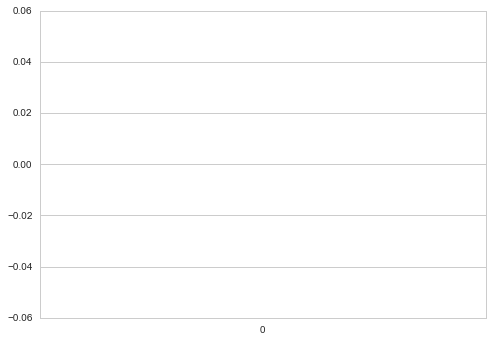

In [54]:
sns.stripplot()